In [25]:
"""
You may need to install these dependencies.
%pip install numpy
%pip install opencv-python
%pip install torch
%pip install matplotlib
"""
from matplotlib import animation
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import os, cv2, numpy as np
from modular_nca import config, hex_renderer, hex_neural_model, hex_dataset

In [26]:
# Select an epoch from 'training_checkpoints' to evaluate.
# If left as None, the latest will be used
eval_epoch_num = None # 2

In [27]:
# Setup

render_size = (400, 400)

model = hex_neural_model.HexNeuralModel(num_hidden_layers=12, nn_hidden_layer_sizes=(96, ), divisions=110)
renderer = hex_renderer.HexRenderer(render_size, model)
dataset = hex_dataset.HexDataset(model)

source_image = cv2.imread(config.dataset_dir + config.dataset_name + "-source.png")
source_image = cv2.resize(source_image, render_size)
source_image = cv2.cvtColor(source_image, cv2.COLOR_BGR2RGB)

print("Loading dataset: '%s'." %config.dataset_name)
dataset.load_time_series(config.dataset_path, start=0, end=1, stride=1, blur_strength=0.012)

if eval_epoch_num is None:
	eval_epoch_num = sorted([int(f.split("-")[-1].split(".")[0]) for f in os.listdir(config.checkpoint_dir)])[-1]

print("Loading pre-trained model from epoch %d." %eval_epoch_num)
model.load_nn(eval_epoch_num)

model.set_mask(dataset.masks[0])

Loading dataset: 'leaf-mono-small'.
Created 2 time series samples from dataset path training_datasets/leaf-mono-small/.
Loading pre-trained model from epoch 4464.


In [28]:
def make_preview_image(title="", show_hidden=False, show_source=False):
	mode = 0 if not show_hidden else int((model.num_layers-4)/3 + 3)
	result = renderer.update(mode)

	result = cv2.cvtColor(result, cv2.COLOR_BGR2RGB) # OpenCV operates with BGR format

	if show_source:
		result = np.hstack((source_image, result))

	return title, result

def show_preview(preview):
	title, image = preview
	plt.title(title)
	plt.axis("off")
	plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
	plt.imshow(image)

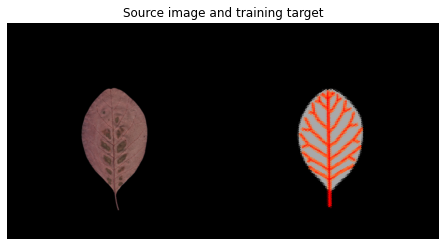

In [29]:
# Display target image

model.reset_grid_seed(dataset.samples[-1])
preview = make_preview_image("Source image and training target", show_source=True)
show_preview(preview)

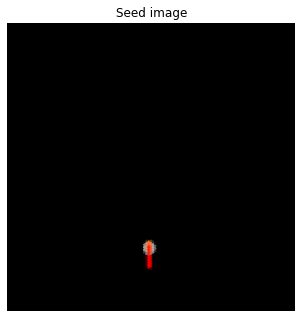

In [30]:
# Display seed image, the simulation starting point

model.reset_grid_seed(dataset.samples[0])
preview = make_preview_image(title="Seed image")
show_preview(preview)

In [31]:
# Run simulation for 500 steps
model.reset_grid_seed(dataset.samples[0])
step_count = 500
preview_interval = 10

intermediate_results = []
for i in range(step_count+1):
	model.step()

	if (i % preview_interval) == 0:
		print("Running step %d/%d" %(i, step_count))
		preview = make_preview_image(title="Simulation state after %d steps" %i, show_hidden=True)
		intermediate_results.append(preview)

print("Simulation completed.")

Running step 0/500
Running step 10/500
Running step 20/500
Running step 30/500
Running step 40/500
Running step 50/500
Running step 60/500
Running step 70/500
Running step 80/500
Running step 90/500
Running step 100/500
Running step 110/500
Running step 120/500
Running step 130/500
Running step 140/500
Running step 150/500
Running step 160/500
Running step 170/500
Running step 180/500
Running step 190/500
Running step 200/500
Running step 210/500
Running step 220/500
Running step 230/500
Running step 240/500
Running step 250/500
Running step 260/500
Running step 270/500
Running step 280/500
Running step 290/500
Running step 300/500
Running step 310/500
Running step 320/500
Running step 330/500
Running step 340/500
Running step 350/500
Running step 360/500
Running step 370/500
Running step 380/500
Running step 390/500
Running step 400/500
Running step 410/500
Running step 420/500
Running step 430/500
Running step 440/500
Running step 450/500
Running step 460/500
Running step 470/500
Run

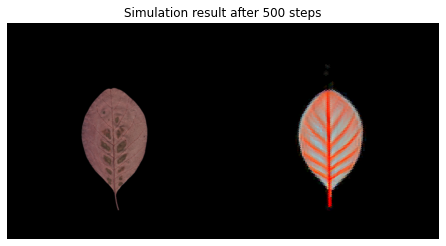

In [32]:
preview = make_preview_image(title="Simulation result after %d steps" %step_count, show_hidden=False, show_source=True)
show_preview(preview)

In [33]:
def make_video_preview(sequence):
	# Adapted from: https://gist.github.com/foolishflyfox/e30fd8bfbb6a9cee9b1a1fa6144b209c

	title, image = sequence[0]
	fig = plt.figure(facecolor="none")

	plt.title(title)
	plt.axis("off")
	plt.subplots_adjust(left=0, right=1, top=0.9, bottom=0)

	def animate(i):
		title, image = sequence[i]
		plt.title(title)
		frame = plt.imshow(image)
		return (frame,)

	result = animation.FuncAnimation(fig, animate, frames=len(sequence), interval=100, repeat_delay=1, repeat=True)
	display(HTML(result.to_html5_video()))
	
make_video_preview(intermediate_results)